In [1]:
%matplotlib widget

C:\Users\Lloyd\AppData\Local\Temp\ipykernel_19992\2057097199.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(easter_days, rotation=90)


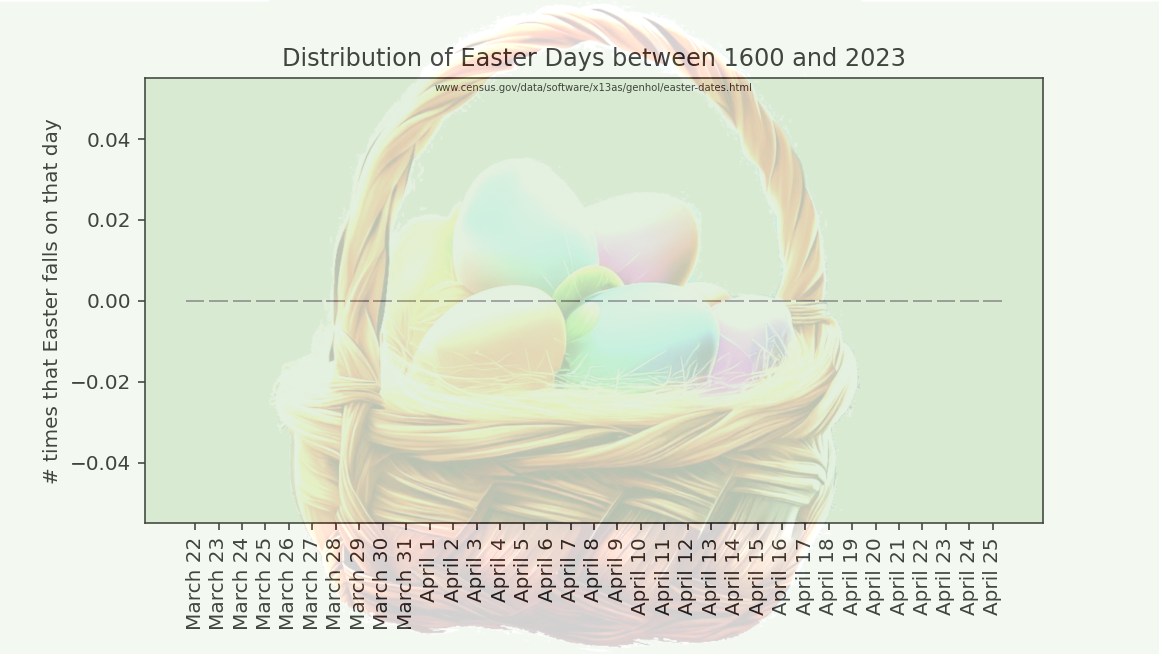

In [2]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mpc
#from PIL import Image 

# Read the data from the file which has dates from 1600 - 2099
df = pd.read_fwf('easter500.txt', header=None, names=['month', 'day', 'year'])
# Select just years less than or equal to 2023
df_1600_2023 = df[df['year'] <= 2023]

# create a dictionary with month-day as keys and values as 0 using dict comprehension
easter_days = ['March 22', 'March 23', 'March 24', 'March 25', 'March 26', 'March 27', 'March 28', 'March 29', 'March 30', 'March 31', 
        'April 1', 'April 2', 'April 3', 'April 4', 'April 5', 'April 6', 'April 7', 'April 8', 'April 9', 'April 10', 'April 11', 
        'April 12', 'April 13', 'April 14', 'April 15', 'April 16', 'April 17', 'April 18', 'April 19', 'April 20', 'April 21', 
        'April 22', 'April 23', 'April 24', 'April 25']
easter_dict = {k:0 for k in easter_days}
#easter_dict = {k:np.random.randint(0,22) for k in easter_days}

# rainbow is a continuious color map.
# Desaturate it by first converting it to HSV color space and then reducing the saturation component
# Convert it back to RGB and create a new ListedColorMap
saturation = 0.5
rainbow = plt.cm.rainbow(np.linspace(0, 1, 21))
hsv_rainbow = mpc.rgb_to_hsv(rainbow[:,:3])
hsv_rainbow[:,1] *= saturation
pastel_cools = mpc.hsv_to_rgb(hsv_rainbow)
pastel_cools = ListedColormap(pastel_cools)
colors = pastel_cools(np.linspace(0, 1, 21))

# Set the resolution of the figure
dpi = 144

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=dpi)
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)

#img = Image.open('basket2_filled.jpg')
img = plt.imread('basket2_filled_169_80.jpg')
fig.figimage(img, resize=True, alpha=0.3)

# Set the background color of the chart
# Light gray: '#D3D3D3'
# Light yellow: '#FFFFE0'
# Light green: '#90EE90'
ax.set_facecolor ('#d9ead3')

# Set the label of the x-axis
#ax.set_xlabel('Days between March 22 and April 25')

# Set the label of the y-axis
ax.set_ylabel('# times that Easter falls on that day')

# Set the title of the chart
ax.set_title('Distribution of Easter Days between 1600 and 2023')

# Rotate the x-axis labels 90 degrees
ax.set_xticklabels(easter_days, rotation=90)

# Remove the outline on the text box
bbox = dict(facecolor='lightblue', edgecolor='none')

# Create the text box on the chart to show the current year using red colored text
text = ax.text(.98, 0.96, '', transform=ax.transAxes, fontsize=10, ha='right', va='top', color='red') #, bbox=bbox

# Show source of data
ax.text(0.5, 0.99, 'www.census.gov/data/software/x13as/genhol/easter-dates.html', transform=ax.transAxes, fontsize=5, ha='center', va='top', color='black')

info_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, fontsize=8, 
                    ha='center', va='top', color='darkviolet')


# Initialize the chart with bars using easter_dict
bar_container = ax.bar(easter_days,easter_dict.values(), edgecolor="gray", color= [colors[v] for v in easter_dict.values()])

def init_animate():
    ax.set_ylim(0, max(easter_dict.values()) + 3  if max(easter_dict.values()) + 3 > 5 else 5)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.imshow(img, extent=[0, plt.xlim() , 0, plt.ylim()])
    bar_container = ax.bar(easter_days,easter_dict.values(), edgecolor="gray", color= [colors[v] for v in easter_dict.values()])
    text.set_text("1600")
    return bar_container.patches


# bar_container.patches is a list of all the rectangles that compose the bar chart.
# For each frame, increment the count in easter_dict for easter_day_to_update and also update the height of the rectangle.
# By default, dicts are ordered and we aren't changing keys, so easter_days is an ordered list of keys
# bar_container_patches_index = easter_days.index(easter_day_to_update)
def prepare_animation(bar_container):

    def animate(frame_number):
        easter_day_to_update = f'{calendar.month_name[df_1600_2023.at[frame_number,"month"]]} {df_1600_2023.at[frame_number,"day"]}'
        easter_dict[easter_day_to_update] += 1
        # Set the maximum value of the y-axis to grow from 5 to the maximum frequency count.
        ax.set_ylim(0, max(easter_dict.values()) + 3  if max(easter_dict.values()) + 3 > 5 else 5)
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.imshow(img, extent=[0, plt.xlim() , 0, plt.ylim()])
        bar_container_patches_index = easter_days.index(easter_day_to_update)
        bar_container.patches[bar_container_patches_index].set_height(easter_dict[easter_day_to_update])
        bar_container.patches[bar_container_patches_index].set_facecolor(colors[easter_dict[easter_day_to_update]])
        #bar_container.patches[bar_container_patches_index].set_alpha(0.5)
        # Add one more character with each frame using slicing
        info_text.set_text('Easter Day is the Sunday after the full moon after the spring equinox.'[:frame_number+1])

        text.set_text(df_1600_2023.at[frame_number,"year"])
        return bar_container.patches
    return animate


ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames=len(df_1600_2023), 
                              init_func=init_animate,
                              interval = 75, 
                              repeat=False, blit=True)

plt.show()
#html_vid = ani.to_html5_video()
#with open("easter_vid.html", "w") as file:
#    file.write(html_vid)


In [96]:
max(easter_dict.values())

22

In [87]:
df.at[0,'month']

4

In [73]:
len(bar_container.patches)

35

In [46]:
import matplotlib.colors as mpc

hsv_col = mpc.rgb_to_hsv(colors[:,:3])

In [50]:
colors[:,:3]

array([[0.        , 1.        , 1.        ],
       [0.04705882, 0.95294118, 1.        ],
       [0.09411765, 0.90588235, 1.        ],
       [0.14117647, 0.85882353, 1.        ],
       [0.18823529, 0.81176471, 1.        ],
       [0.23529412, 0.76470588, 1.        ],
       [0.28627451, 0.71372549, 1.        ],
       [0.33333333, 0.66666667, 1.        ],
       [0.38039216, 0.61960784, 1.        ],
       [0.42745098, 0.57254902, 1.        ],
       [0.4745098 , 0.5254902 , 1.        ],
       [0.5254902 , 0.4745098 , 1.        ],
       [0.57254902, 0.42745098, 1.        ],
       [0.61960784, 0.38039216, 1.        ],
       [0.66666667, 0.33333333, 1.        ],
       [0.71372549, 0.28627451, 1.        ],
       [0.76470588, 0.23529412, 1.        ],
       [0.81176471, 0.18823529, 1.        ],
       [0.85882353, 0.14117647, 1.        ],
       [0.90588235, 0.09411765, 1.        ],
       [0.95294118, 0.04705882, 1.        ],
       [1.        , 0.        , 1.        ]])

In [47]:
hsv_col

array([[0.5       , 1.        , 1.        ],
       [0.50823045, 0.95294118, 1.        ],
       [0.51731602, 0.90588235, 1.        ],
       [0.52739726, 0.85882353, 1.        ],
       [0.53864734, 0.81176471, 1.        ],
       [0.55128205, 0.76470588, 1.        ],
       [0.56684982, 0.71372549, 1.        ],
       [0.58333333, 0.66666667, 1.        ],
       [0.60232068, 0.61960784, 1.        ],
       [0.62442922, 0.57254902, 1.        ],
       [0.65049751, 0.5254902 , 1.        ],
       [0.68283582, 0.5254902 , 1.        ],
       [0.70890411, 0.57254902, 1.        ],
       [0.73101266, 0.61960784, 1.        ],
       [0.75      , 0.66666667, 1.        ],
       [0.76648352, 0.71372549, 1.        ],
       [0.78205128, 0.76470588, 1.        ],
       [0.79468599, 0.81176471, 1.        ],
       [0.80593607, 0.85882353, 1.        ],
       [0.81601732, 0.90588235, 1.        ],
       [0.82510288, 0.95294118, 1.        ],
       [0.83333333, 1.        , 1.        ]])

In [51]:
pastel_col = mpc.hsv_to_rgb(hsv_col)
pastel_col[:,1] *= 0.5

In [53]:
pastel_col.shape

(22, 3)